In [7]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [8]:
#importar os dados
dataset = pd.read_csv("tempo.csv", sep=";")

#visualizar os dados

dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [9]:
#tamanho do conjunto de dados
dataset.shape

(14, 5)

In [10]:
#Explorar os dados categóricos
#verificar a quantidade de dados para as colunas

agrupado = dataset.groupby('Aparencia').size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [11]:
dataset['Aparencia'].describe()

count      14
unique      4
top       sol
freq        5
Name: Aparencia, dtype: object

<AxesSubplot:xlabel='Aparencia'>

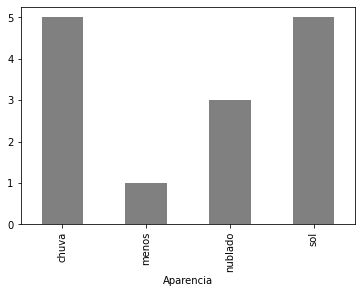

In [12]:
agrupado.plot.bar(color = 'gray')

In [13]:
#Categoria de aparencia errado! Substituir por SOL

dataset.loc[dataset['Aparencia'].isin(['menos']),'Aparencia'] = "sol"

In [14]:
agrupado = dataset.groupby('Aparencia').size()
agrupado

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

<AxesSubplot:xlabel='Aparencia'>

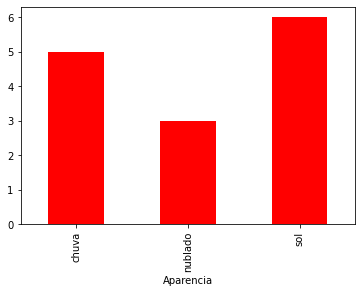

In [15]:
agrupado.plot.bar(color = 'red')

In [16]:
agrupado = dataset.groupby('Temperatura').size()
agrupado

Temperatura
64      1
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64

In [17]:
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Temperatura')

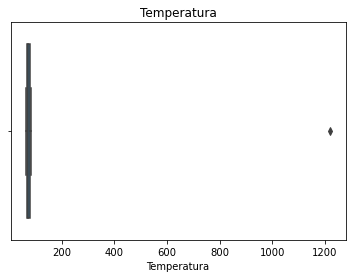

In [18]:
srn.boxplot(dataset['Temperatura']).set_title("Temperatura")

In [19]:
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [20]:
dataset.loc[dataset['Temperatura'].isin([1220]),'Temperatura'] = mediana
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,NaN,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Temperatura')

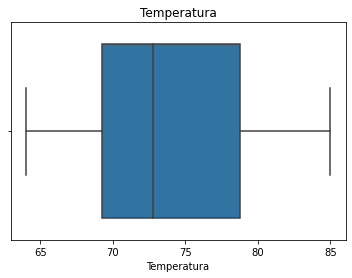

In [21]:
srn.boxplot(dataset['Temperatura']).set_title("Temperatura")

In [22]:
agrupa = dataset.groupby('Umidade').size()
agrupa

#Verificou-se que existe valores fora do grupo de 0 a 100

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

In [23]:
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [24]:
dataset.loc[(dataset['Umidade'] <0) | (dataset['Umidade']>100), 'Umidade'] = mediana

agrupa = dataset.groupby('Umidade').size()
agrupa

Umidade
65.0    1
70.0    3
75.0    1
80.0    1
85.0    1
85.5    1
86.0    1
90.0    2
91.0    1
95.0    1
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Umidade')

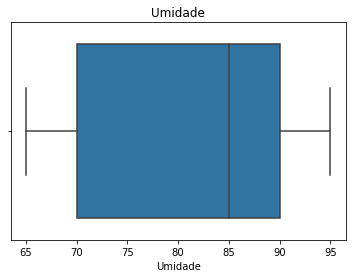

In [25]:
srn.boxplot(dataset['Umidade']).set_title("Umidade")

In [26]:
agrupa = dataset.groupby(['Vento']).size()
agrupa

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [27]:
agrupa = dataset.groupby(['Jogar']).size()
agrupa

Jogar
nao    5
sim    9
dtype: int64

In [28]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [29]:
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [33]:
dataset['Umidade'].fillna(mediana,inplace=True)

In [34]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          1
Jogar          0
dtype: int64

In [38]:
agrupado = dataset.groupby(['Vento']).size() 
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [50]:
dataset['Vento'].fillna('FALSO',inplace=True)
dataset.loc[dataset['Vento'] == 'Falso','Vento'] = "FALSO"

In [51]:
agrupado = dataset.groupby(['Vento']).size() 
agrupado

Vento
FALSO         8
VERDADEIRO    6
dtype: int64

In [52]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64